# Homework 1
## EXPLORING IRIS DATASET WITH EDA

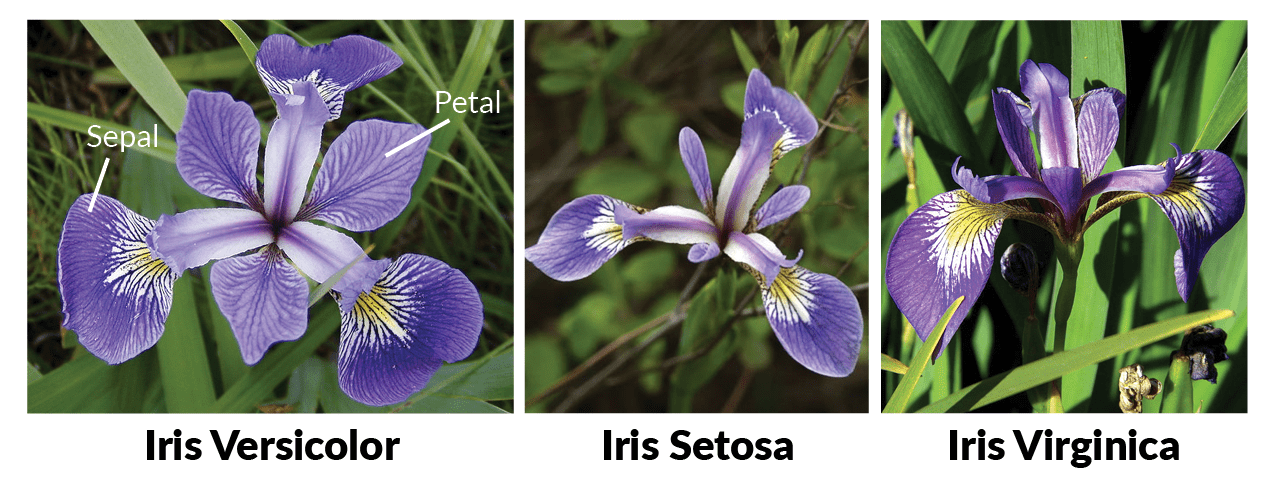

In [1]:
from IPython.display import Image
Image("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png")

## Authors:
Rasesh Garg    
Sahil Kala    
Sankirna Joshi    

### Table of contents

1. [Background](#back)
2. [Exploratory Data Analysis](#eda)     
    2.0 [Preparing Data](#prep)    
    2.1 [Predictor variables and Response variable](#pvrv)    
    2.2 [Summary Statistics](#sumstat)    
    2.3 [Histogram](#hist)    
    2.4 [Pairwise plots](#pvp)    
    2.5 [Box plots](#box)    
3. [Supervised Learning](#sup)   
4. [Unsupervised Learning](#unsup)

<a id="back"></a>
## 1. Background

The Iris flower data set, or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture and picked on the same day and measured at the same time by the same person with the same apparatus".
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. [1]
Generally, in real world problem we get historical data which consist of predictor variables and actual response and this is the data on which we train our models. This set of data is also called Training set. Once we train our data we try to predict the response for the data which is important for the management for decision making.
Since this project is for learning purpose, we have divided our data into 80-20 ratio. We have used a random sampling using the seed – 13023164. The 80% data will be used as training dataset and the remaining data will be used as our test data sets. In the end we will gauge our model’s performance by comparing the predicted result with the actual response of the test data.
This project consists various steps which are typical to a data mining project. We will start with basic exploratory data analysis and then try to fit apply Supervised and Unsupervised learning techniques for modelling  .


<a id ="eda"></a>
## 2. Exploratory Data Analysis

The first and most important aspect of any data mining project is to know the data which includes-
1.	No of predictor variables
2.	Summary statistics of predictors
3.	Histogram of variable to see the distribution
4.	Pair wise plots 
5.	Box plots

Let’s look at each of this individually.



<a id="prep"></a>
### 2.0 Preparing Data

- We will import the dataset using `sklearn` and import all the necessary libraries. We will be using the following packages.
    - `pandas`
    - `numpy`
    - `matplotlib`
    - `plotnine`
    - `seaborn`
    - `sklearn`

In [1]:
# Imports
from IPython.display import HTML
import pandas as pd
import numpy as np

#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
dataset=load_iris()
data=pd.DataFrame(dataset['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
data['Species']=dataset['target']
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])
iris = data

<a id="pvrv"></a>
### 2.1 Predictor variables and Response variable
To know what data, we have at hand we can look at the first few rows using head command. Below table clearly shows us that we have 5 variables out of which Petal_length, petal_Width, Sepal_Length and Sepal_Width are our predictor variables. And Species is our Response variable.

In [3]:
display(iris.head())

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<a id="sumstat"></a>
### 2.2 Summary Statistics of the predictor variables

Below table clearly mentions the basic summary statistics like mean, standard deviation, percentiles for each of our predictor variables. This summary includes all our sample data.   
Importance of this result is that we can find out any discrepancies while data was recorded. For example, we can find out by max and min values if we have any dirty data or outliers. 


In [4]:
display(iris.describe())

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The above chart is the overall summary of our variable without considering the response variable category. So lets look at how our predictor variable in the training sets are distributed among each category.

In [5]:
print('\n\t\t\tSetosa')
display(iris[iris.Species == 'setosa'][['Petal length','Petal Width','Sepal Length','Sepal Width']].describe())


			Setosa


,Petal length,Petal Width,Sepal Length,Sepal Width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [6]:
print('\n\t\tVersicolor')
display(iris[iris.Species == 'versicolor'][['Petal length','Petal Width','Sepal Length','Sepal Width']].describe())


		Versicolor


,Petal length,Petal Width,Sepal Length,Sepal Width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [7]:
print('\n\t\tvirginica')
display(iris[iris.Species == 'virginica'][['Petal length','Petal Width','Sepal Length','Sepal Width']].describe())


		virginica


,Petal length,Petal Width,Sepal Length,Sepal Width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


<a id ="hist"></a>
### 2.3 Histograms

Although very simple to create, these charts are very powerful and tell us about the distribution of our variables. These visual tells the reader about how the variables are distributed and find out if they follow a distribution.

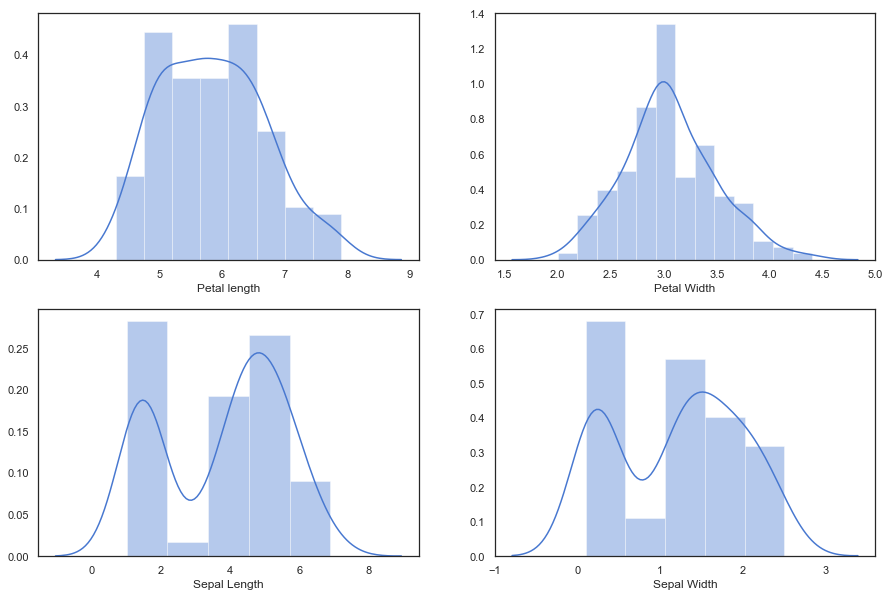

In [8]:
sns.set(style="white", palette="muted")
plt.figure(figsize=(15,10))
plt.subplot(2,2,1);
sns.distplot(iris["Petal length"])
plt.subplot(2,2,2);
sns.distplot(iris["Petal Width"])
plt.subplot(2,2,3);
sns.distplot(iris["Sepal Length"])
plt.subplot(2,2,4);
sns.distplot(iris["Sepal Width"])
plt.show();

We can also consider the below visualization which puts all the variables on a single chart and compare them on the same scale.

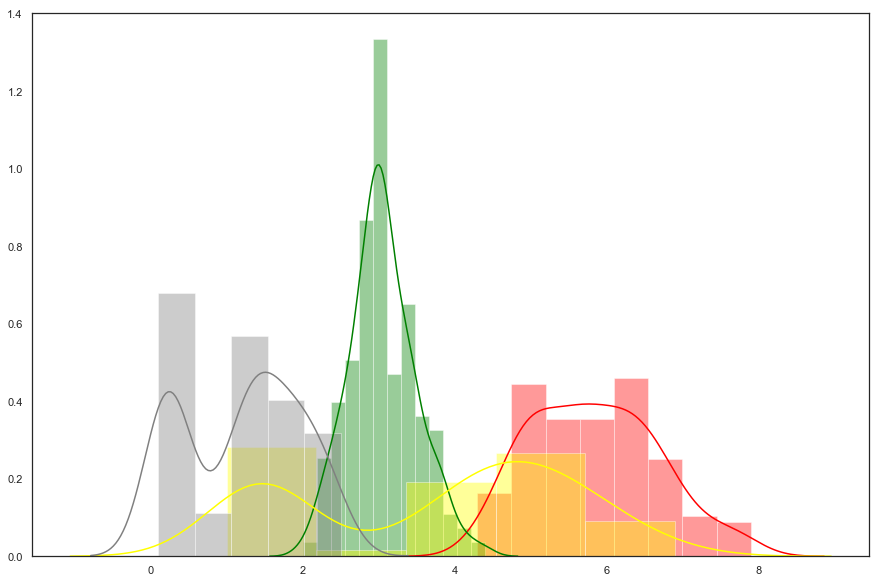

In [9]:
plt.figure(figsize=(15,10))
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
#.distplot(data)
for col_id in iris.columns[:-1]:
    col = {'Petal length': 'red', 'Petal Width': 'green', 'Sepal Length': 'yellow', 'Sepal Width': 'gray'}
    sns.distplot(iris[col_id],color=col[col_id])
plt.xlabel("")
plt.show();

In the above chart, the color coding is as follows:
- Petal length: Red
- Petal Width: Green 
- Sepal Length: Blue
- Sepal Width: Yellow

<a id="pvp"></a>
### 2.4 Pairwise Plots

Another powerful yet easy to understand plot is called pair wise plots which enables the user to compare each variable with respect to the response or categories. They include scatterplots for comparing nominal variables and the the kde plots for visualizing distributions of the features 

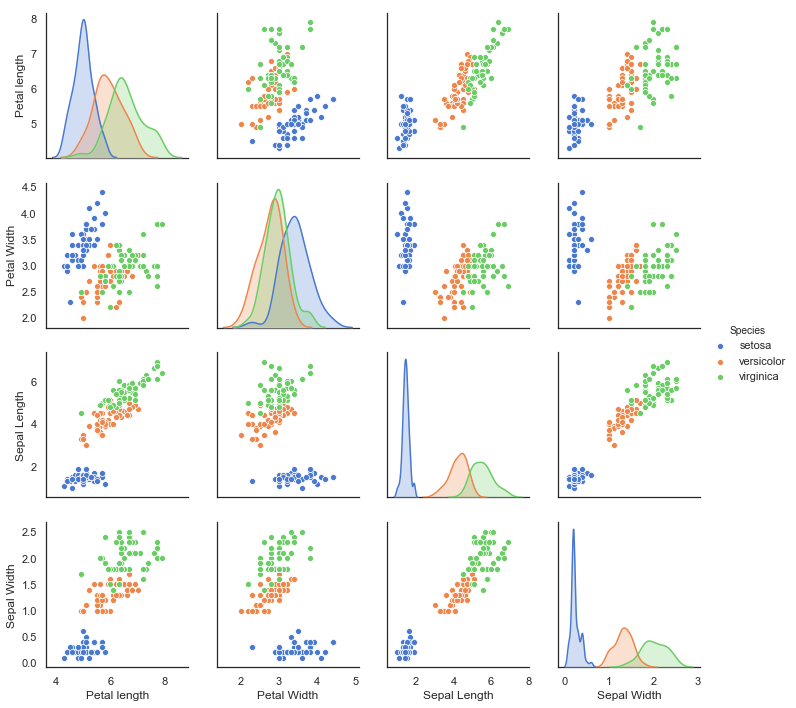

In [10]:
g = sns.pairplot(iris,hue='Species')

<a id="box"></a>
### 2.5 Box Plots

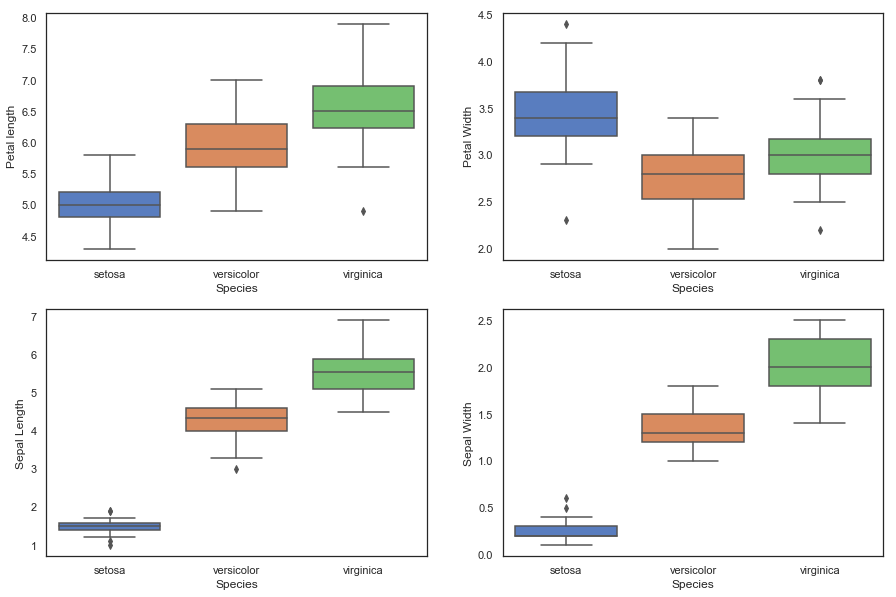

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='Petal length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='Petal Width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='Sepal Length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='Sepal Width',data=iris)
plt.show();

<a id ="sup"></a>
## 3. Supervised Learning
### Importing Classification and Clustering Packages

`Random seed = 13023164`

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
rand = np.random.seed(13023164)

#### Splitting training set in 80:20 to create a test group. 

In [25]:
X = iris.iloc[:,:4]
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand)

#### Calculating accuracy score for different values of k

In [15]:
n_neighbors = [1,2,3,4,5]
score = []
X = iris.iloc[:,:4]
y = iris['Species']

for i,n in enumerate(n_neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13023164)
    knn = KNeighborsClassifier(n_neighbors= n).fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))
    print("Prediction accuracy for k = "+ str(n)+ " is : "+ str(score[i]))

Prediction accuracy for k = 1 is : 1.0
Prediction accuracy for k = 2 is : 1.0
Prediction accuracy for k = 3 is : 1.0
Prediction accuracy for k = 4 is : 1.0
Prediction accuracy for k = 5 is : 1.0


**Remarks:** We are able to achieve a 100% accuracy on the 20% test data with all values of k_neighbours.

**How K Neighbour works:**    
For a given test input, K Neighbour algorithm searches nearest k data points in the training data set. Whatever the majority class in these set of k points is, the algorithm predicts that as the class of the test data.


<a id="unsup"></a>
## 4. Unsupervised Learning
### Clustering    
Performing k Means clustering using first four features (Petal Length, Petal Width, Sepal Length, Sepal Width) as input features.    
-  Using n_clusters = 4 as we already know that the dataset contains 4 unique clusters

In [16]:
kmeans = KMeans(n_clusters = 4, random_state=13023164).fit(X)
y_labels = kmeans.labels_
y_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1])

**How Kmeans works:**    
Its a recursive algorith which tries to minimise the sum of square distance of the data points from their respective cluster centers.    
Below are the main steps involved in the algorithm:
1. Randomly intialize centroids from the data ( Number of centroids = number of cluster, which is an input parameter)
2. Iterative steps:    
    a. Assign points to the nearest cluster centroid, thus forming unique clusters    
    b. Calculates sum of Square distance of points in the cluster from their respective centroids    
    c. Within cluster, finds the new centroids and assigns them as new cluster centroids    
    d. Back to step a    
    
Stopping criteria like maximum number of iteration or delta in centroids is used to end this recursive loop.
Final clusters are obtained such that sum of square distance of points from their cluster center is minimized. 

### Evaluating Clustering

In [17]:
#Importing adjusted rand_score, a popular method to evaluate cluster when true labels are known
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y_labels, y)

0.6498176853819967

A score of zeros means random clustering, whereas a score of 1 means perfect clustering.
So we can see that kMeans is not able to perfectly cluster the given data set.

In [23]:
# Combining the obtained cluster labels and origional cluster labels in a data frame
pd.set_option('display.max_rows', 150)
a = pd.DataFrame(y_labels,y)
display(HTML(a.to_html()))

,0
Species,
setosa,0
setosa,0
setosa,0
setosa,0
setosa,0
setosa,0
setosa,0
setosa,0
setosa,0
